In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob

In [2]:
spacecraft_launches = pd.DataFrame(columns=("Year","Spacecraft Name","NSSDCA ID","Launch Date","Site","Vehicle","Funder"))

for file in glob("spaceCraftquerys/*.csv"):
    df = pd.read_csv(file,index_col=0,parse_dates=['Launch Date'])
    df["Year"] = np.full((len(df)),int(file.split('\\')[1][:-4]))
    spacecraft_launches = spacecraft_launches.append(df)
spacecraft_launches = spacecraft_launches[spacecraft_launches['Vehicle'].str.contains(r'[^\s]+',regex=True,na=False)]
spacecraft_launches = spacecraft_launches.drop_duplicates(subset=['Launch Date','Site','Vehicle'])


In [3]:
soyuz = spacecraft_launches[spacecraft_launches["Vehicle"].str.contains('Soyuz',regex=True,na=False)].sort_values('Year')
udssr = spacecraft_launches[spacecraft_launches["Site"].str.contains(r'U\.S\.S\.R|Russia|Baikonur Cosmodrome',regex=True,na=False)].sort_values('Year')

In [4]:
falcon = spacecraft_launches[spacecraft_launches["Vehicle"].str.contains('Falcon',regex=True,na=False)].sort_values('Year')
shuttle = spacecraft_launches[spacecraft_launches["Vehicle"].str.contains('Shuttle',regex=True,na=False)].sort_values('Year') 
usa = spacecraft_launches[spacecraft_launches["Site"].str.contains(r'United States',regex=True,na=False)].sort_values('Year')

In [5]:
esa = spacecraft_launches[spacecraft_launches["Site"].str.contains(r'French Guiana',regex=True,na=False)].sort_values('Year')
ariane = spacecraft_launches[spacecraft_launches["Vehicle"].str.contains('Ariane',regex=True,na=False)].sort_values('Year')

In [6]:
china = spacecraft_launches[spacecraft_launches["Site"].str.contains(r'Peoples Republic of China',regex=True,na=False)].sort_values('Year')
japan = spacecraft_launches[spacecraft_launches["Site"].str.contains(r'Japan',regex=True,na=False)].sort_values('Year')


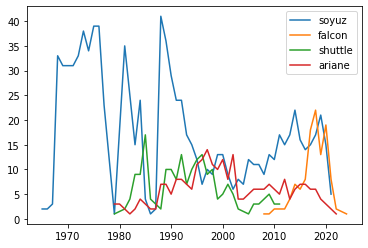

In [7]:
soyuz['Year'].value_counts().sort_index().plot(y=1,label='soyuz')
falcon['Year'].value_counts().sort_index().plot(y=1,label='falcon')
shuttle['Year'].value_counts().sort_index().plot(y=1,label='shuttle')
ariane['Year'].value_counts().sort_index().plot(y=1,label='ariane')

plt.legend()

In [8]:
for year in spacecraft_launches['Year'].unique():
    print(f"{year}: {spacecraft_launches[spacecraft_launches['Year']==year]['Vehicle'].value_counts().index[0]}")

1957:  Modified SS-6 (Sapwood)
1958:  Vanguard
1959:  Thor
1960:  Thor
1961:  Thor
1962:  Thor-Agena
1963:  Thor Augmented Delta-Agena D
1964:  Thor Augmented Delta-Agena D
1965:  Thor Augmented Delta-Agena D
1966:  Atlas-Agena D
1967:  Voskhod
1968:  Soyuz
1969:  Soyuz
1970:  Soyuz
1971:  Soyuz
1972:  Soyuz
1973:  Soyuz
1974:  Soyuz
1975:  Soyuz
1976:  Soyuz
1977:  Soyuz
1978:  Modified SS-6 (Sapwood) with 2nd Generation (Longer) Upper Stage
1979:  Modified SS-6 (Sapwood) with 2nd Generation (Longer) Upper Stage
1980:  Modified SS-6 (Sapwood) with 2nd Generation (Longer) Upper Stage
1981:  Soyuz-U
1982:  Modified SS-6 (Sapwood) with 2nd Generation (Longer) Upper Stage
1983:  Modified SS-6 (Sapwood) with 2nd Generation (Longer) Upper Stage
1984:  Soyuz
1985:  Modified SS-6 (Sapwood) with 2nd Generation (Longer) Upper Stage
1986:  Modified SS-6 (Sapwood) with 2nd Generation (Longer) Upper Stage
1987:  Modified SS-6 (Sapwood) with 2nd Generation (Longer) Upper Stage
1988:  Soyuz
1989:  S

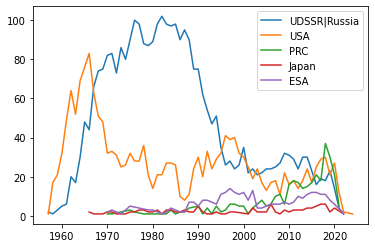

In [9]:
udssr['Year'].value_counts().sort_index().plot(y=1,label='UDSSR|Russia')
usa['Year'].value_counts().sort_index().plot(y=1,label='USA')
china['Year'].value_counts().sort_index().plot(y=1,label='PRC')
japan['Year'].value_counts().sort_index().plot(y=1,label='Japan')
esa['Year'].value_counts().sort_index().plot(y=1,label='ESA')


plt.legend()